In [1]:
import numpy as np
import matplotlib.pyplot as plt

We have a requirement, MACH3-Tier4_REQ-1116, that says we can configure hte output power < 0.02dB.  I question if this is possible with fixed point numbers across the entire range.

This script will walk through all the possibilities and calculate the error




In [6]:
dB_request = -0.02*np.arange(4096);
calculated_value = 10**(dB_request/20)*32767
rounded_value = np.round(calculated_value)
dB_given = 20*np.log10(rounded_value/32767)
error_signal = dB_request - dB_given

A bunch of things calculated.  In each case we are requesting a 0.02dB change.  We've calculated what fixed point value would be required, then rounded it.
With the rounded value, calculate the actual dB change.  Then calculate the error.  Should become less accurate as power decreases

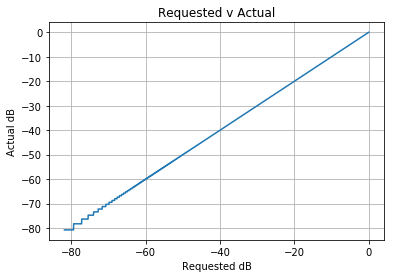

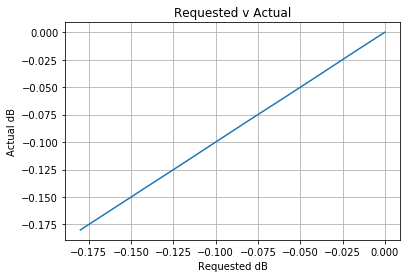

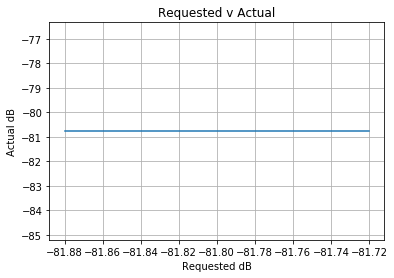

In [11]:
plt.figure()
plt.plot(dB_request, dB_given)
plt.title('Requested v Actual')
plt.xlabel('Requested dB')
plt.ylabel('Actual dB')
plt.grid(True)
plt.show()
plt.figure()
plt.plot(dB_request[0:10], dB_given[0:10])
plt.title('Requested v Actual')
plt.xlabel('Requested dB')
plt.ylabel('Actual dB')
plt.grid(True)
plt.show()
plt.figure()
plt.plot(dB_request[-10:-1], dB_given[-10:-1])
plt.title('Requested v Actual')
plt.xlabel('Requested dB')
plt.ylabel('Actual dB')
plt.grid(True)
plt.show()

Let's look at the error

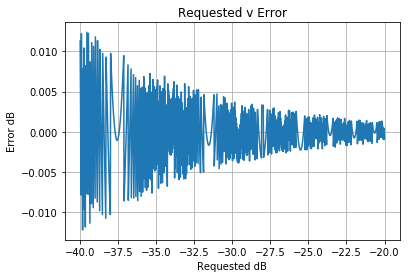

In [18]:
plt.figure()
plt.plot(dB_request[1000:2000], error_signal[1000:2000])
plt.title('Requested v Error')
plt.xlabel('Requested dB')
plt.ylabel('Error dB')
plt.grid(True)
plt.show()

What digital scale is -40dB?

In [19]:
10**(-40/20)*32767

327.67

In [22]:
np.log10(327)/np.log10(2)

8.353146825498083

Okay, so we fail this at lower dB.  How could it work?  Repeat with 65536

In [25]:
dB_request = -0.02*np.arange(4096);
calculated_value = 10**(dB_request/20)*65535
rounded_value = np.round(calculated_value)
dB_given = 20*np.log10(rounded_value/65535)
error_signal = dB_request - dB_given

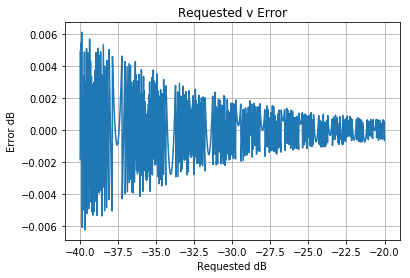

In [26]:
plt.figure()
plt.plot(dB_request[1000:2000], error_signal[1000:2000])
plt.title('Requested v Error')
plt.xlabel('Requested dB')
plt.ylabel('Error dB')
plt.grid(True)
plt.show()

Since the multipliers are 18-bit, why don't we do 18-bit

In [28]:
dB_request = -0.02*np.arange(4096);
calculated_value = 10**(dB_request/20)*2**18
rounded_value = np.round(calculated_value)
dB_given = 20*np.log10(rounded_value/2**18)
error_signal = dB_request - dB_given

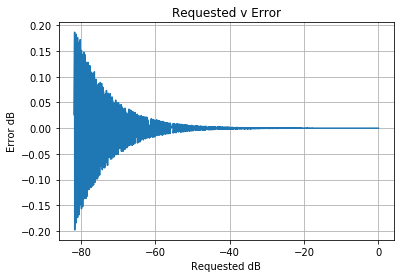

In [30]:
plt.figure()
plt.plot(dB_request, error_signal)
plt.title('Requested v Error')
plt.xlabel('Requested dB')
plt.ylabel('Error dB')
plt.grid(True)
plt.show()

In [31]:
10*np.log10(127**2 + 127**2)

45.08637437575895

In [32]:
10*np.log10(126**2 + 126**2)

45.01771085899107

In [33]:
10*np.log10(127**2 + 127**2)-10*np.log10(126**2 + 126**2)

0.0686635167678773